In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import torchvision

In [0]:
#we download the CIFAR-10 dataset. We divide the dataset in train and test parts.
trainset = torchvision.datasets.CIFAR10(train=True, download=True, root="./data", 
                                        transform = torchvision.transforms.ToTensor())
type(trainset)

Files already downloaded and verified


torchvision.datasets.cifar.CIFAR10

In [0]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [0]:
#the labels in the dataset are the following.
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

In [0]:
trainloader = torch.utils.data.DataLoader(trainset)
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [0]:
#create a dictionary that contains the amount of input images in each layer.

label_count = dict.fromkeys(classes, 0)

for im in trainloader:

    pix, labels = im
    #print(labels)
    label = classes[labels.item()]
    label_count[label] = label_count.get(label)+1

In [0]:
label_count

{' truck': 5000,
 'airplane': 5000,
 'automobile': 5000,
 'bird': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'ship': 5000}

<BarContainer object of 10 artists>

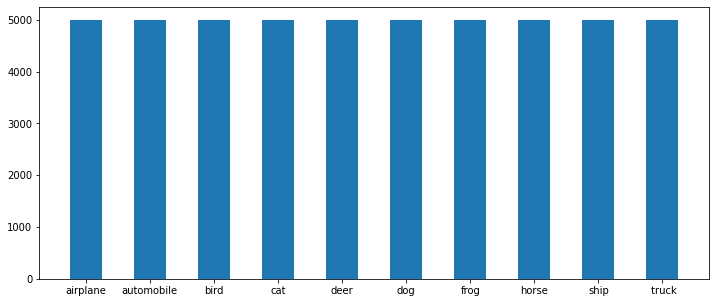

In [0]:
#display the data in a histogram.
colors = ['orange', 'blue', 'yellow', 'brown','red', 'green', 'purple', 'grey', 'cyan', 'black', 'blue']
plt.figure(figsize=(12,5))
plt.bar(label_count.keys(), label_count.values(), width=.5)

In [0]:
def image_show(img):
  np_img = img.numpy()
  np_img = np.transpose(np_img, (1,2,0))
  plt.imshow(np_img)
  plt.show()

Now we will use t-SNE in order to visualize better how the model learns.

In [0]:
from keras.datasets import cifar10
(x, y), (x_test, y_test) = cifar10.load_data()

In [0]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


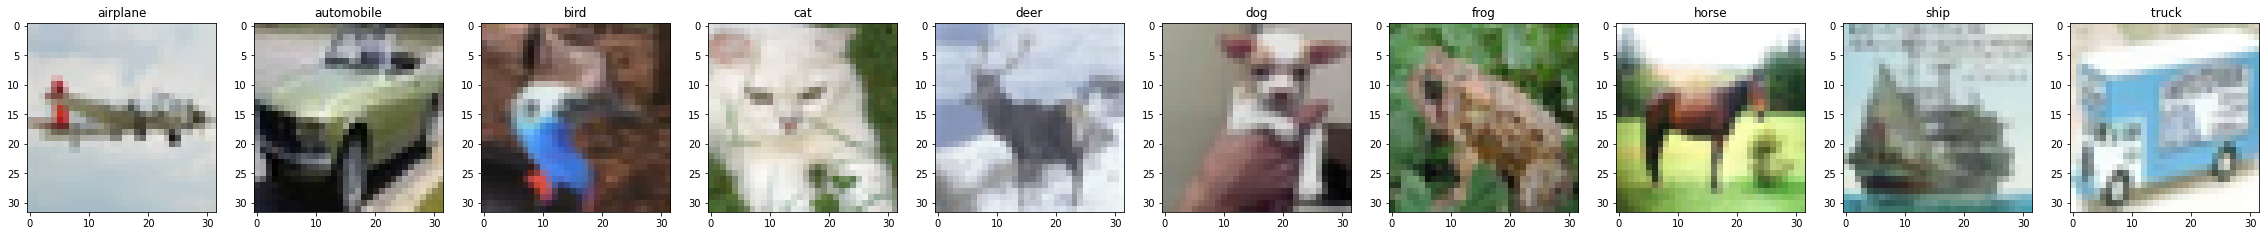

In [0]:
#display of a image for every label
plt.figure(figsize=(40,40))
for i in range(0, len(np.unique(y))):
  im = np.random.choice(np.where(y==i)[0],1)
  plt.subplot(1,10,i+1)
  img=x[im]
  plt.imshow(img[0,:,:,:])
  plt.title(classes[i])

In [0]:
#perform t-sne method
from sklearn.manifold import TSNE
#we need to reshape data as we have a 4-dimensional input data and we need 
cifar10_tsne = TSNE(random_state = 123).fit_transform(x.reshape((len(x),32*32*3)))

In [0]:
plt.figure(figsize=(10,10))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.colorbar()
plt.show()

Display the obtained results

In [0]:
names = ['avg2ex_ex1', 'avg2ex_ex2', 'agv3ex_ex1', 'agv3ex_ex2', 'agv3ex_ex3',
         'pyr2ex_ex1', 'pyr2ex_ex2', 'pyr3ex_ex1', 'pyr3ex_ex2', 'pyr3ex_ex3',]

names_2 = ['avg2ex_ex1', 'avg2ex_ex2','pyr2ex_ex1', 'pyr2ex_ex2', 'norm_train']

names_3 = ['agv3ex_ex1', 'agv3ex_ex2', 'agv3ex_ex3', 'pyr3ex_ex1', 'pyr3ex_ex2', 'pyr3ex_ex3', 'norm_train']

names_e = ['avg2ex_mean', 'avg3ex_mean', 'pyr2ex_mean', 'pyr3ex_mean', 'resnet18']

names_ew = ['avg2ex_wei', 'avg3ex_wei', 'pyr2ex_wei', 'pyr3ex_wei', 'resnet18']


results = dict.fromkeys(names, 0)



#data
avg2ex_ex1 = 85.59
avg2ex_ex2 = 85.24
agv3ex_ex1 = 54.56
agv3ex_ex2 = 84.83
agv3ex_ex3 = 84.63

pyr2ex_ex1 = 86.01
pyr2ex_ex2 = 84.95
pyr3ex_ex1 = 50.41
pyr3ex_ex2 = 84.80
pyr3ex_ex3 = 84.63

avg2ex_e = 85.68
avg3ex_e = 84.84
pyr2ex_e = 86.37
pyr3ex_e = 84.82

avg2ex_ew = 85.95
avg3ex_ew = 84.93
pyr2ex_ew = 86.53
pyr3ex_ew = 85.02


norm_train = 85.73


data = ([avg2ex_ex1, avg2ex_ex2, agv3ex_ex1, agv3ex_ex2, agv3ex_ex3,
         pyr2ex_ex1, pyr2ex_ex2, pyr3ex_ex1, pyr3ex_ex2, pyr3ex_ex3])

data_2 = ([avg2ex_ex1, avg2ex_ex2, pyr2ex_ex1, pyr2ex_ex2, norm_train])

data_3 = ([agv3ex_ex1, agv3ex_ex2, agv3ex_ex3, pyr3ex_ex1, pyr3ex_ex2, pyr3ex_ex3, norm_train])

data_e = ([avg2ex_e, avg3ex_e, pyr2ex_e, pyr3ex_e, norm_train])

data_ew = ([avg2ex_ew, avg3ex_ew, pyr2ex_ew, pyr3ex_ew, norm_train])


ymin = np.min(data)
ymax = np.max(data)

In [0]:
for i in range(0,len(names)):

    x = names[i]
    results[x] = data[i]


In [98]:
results

{'agv3ex_ex1': 54.56,
 'agv3ex_ex2': 84.83,
 'agv3ex_ex3': 84.63,
 'avg2ex_ex1': 85.59,
 'avg2ex_ex2': 85.24,
 'pyr2ex_ex1': 86.01,
 'pyr2ex_ex2': 84.95,
 'pyr3ex_ex1': 50.41,
 'pyr3ex_ex2': 84.8,
 'pyr3ex_ex3': 84.63}

<BarContainer object of 10 artists>

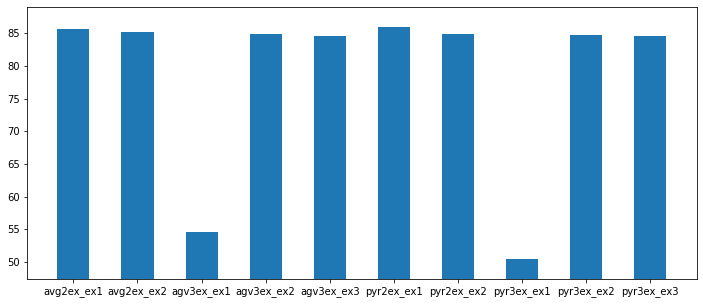

In [100]:
plt.figure(figsize=(12,5))
plt.ylim([ymin-3, ymax+3])
plt.bar(results.keys(), results.values(), width=.5)

In [0]:
norm_results = results

ncolors = [None]*(len(data))

for i in range(0,len(names)):

    x = names[i]
    norm_results[x] = data[i] - norm_train

    if norm_results[x] < 0:
        ncolors[i] = 'red'
    else:
        ncolors[i] = 'green'


yymin = -37
yymax = 3

In [53]:
norm_results
norm_results.pop('norm_train')


-0.7800000000000011

<BarContainer object of 10 artists>

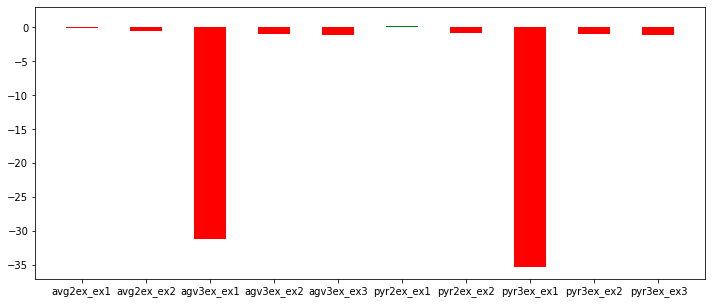

In [54]:
plt.figure(figsize=(12,5))
plt.ylim([yymin, yymax])
plt.bar(norm_results.keys(), norm_results.values(), width=.5, color=ncolors)

In [55]:
del ncolors[7]
del ncolors[2]
ncolors

['red', 'red', 'red', 'red', 'green', 'red', 'red', 'red']

In [56]:
norm_results.pop('agv3ex_ex1')
norm_results.pop('pyr3ex_ex1')
norm_results

{'agv3ex_ex2': -0.9000000000000057,
 'agv3ex_ex3': -1.1000000000000085,
 'avg2ex_ex1': -0.14000000000000057,
 'avg2ex_ex2': -0.4900000000000091,
 'pyr2ex_ex1': 0.28000000000000114,
 'pyr2ex_ex2': -0.7800000000000011,
 'pyr3ex_ex2': -0.9300000000000068,
 'pyr3ex_ex3': -1.1000000000000085}

<BarContainer object of 8 artists>

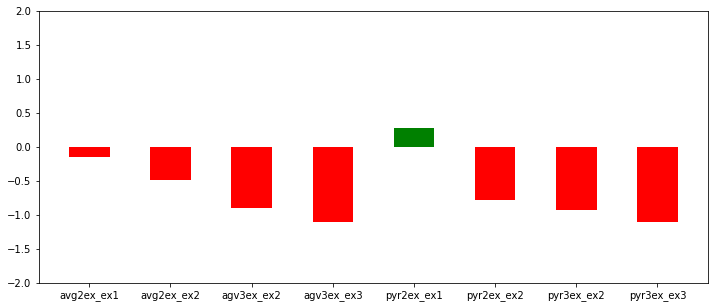

In [57]:
plt.figure(figsize=(12,5))
plt.ylim([-2, 2])
plt.bar(norm_results.keys(), norm_results.values(), width=.5, color=ncolors)